# Final Project Explainer Notebook 

### 02805 Social Graph and Interactions DTU 2022

##### This project was created by Ziwei Chen, Eleftherios Katiforis, Spyridon Vlachospyros


## An investigation on Rick & Morty series


In this notebook we are going to present our investigation and results on the analysis of the Rick & Morty series. To start with we presented our initial goals and ideas in a two minutes video. After that the actual analysis and finding are presented.

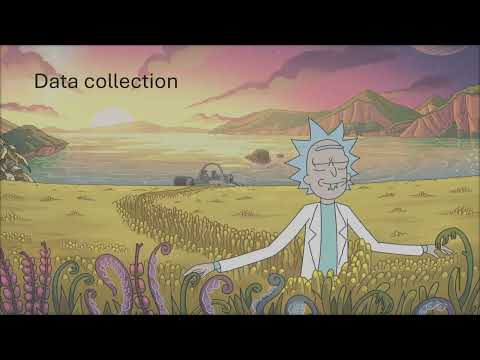

In [1]:
# link: https://www.youtube.com/watch?v=D2lKDo24Sv8&ab_channel=Zoi_Chen
from IPython.display import YouTubeVideo
YouTubeVideo("D2lKDo24Sv8",width=800, height=450)

## Table of contents
- [Introduction](#Introduction)
- [Data collection and preprocessing](#Data-collection-and-preprocessing)
- [Graph Analysis](#Graph-Analysis)

## Introduction


As we have allready mention we will focus on the Rick & Morty universe. We found intrest to these series because Of appealing it is to the audience and because of the multiuniverse it has create around the characters. Humans, alliens, creatures from different planets and universis are perform together in a dark and humoristic episodes. To do this analyis we will need access to some data. Lucky for us we were able to use a variety of sources that we are going to include in the following analysis. First of all, data regarding the characters like their name, species, locations and more were provided in the Rick & Morti [wiki](https://rickandmorty.fandom.com/wiki/Rickipedia). Our second source was the [imdb](https://www.imdb.com/search/title/?series=tt2861424&sort=user_rating,desc&count=250&view=advanced) page of the series where we were able to extract data like the ratings. Last but not least we also gother data about the transcripts of the episode from a [dataset](https://www.kaggle.com/datasets/andradaolteanu/rickmorty-scripts).

## Data collection and preprocessing

Since the notebook whould be too long we didnt include here all the code of just collecting the data. We will only include the code of the graph creation in this notebook. All the other code is available on our github repository or just by following the liks.
* IMDB dataset and ratings [link](https://github.com/lefteriskat/SocialGraphsAndInteractions2022/blob/main/Project/Data/IMDB_ratings_parser.ipynb)
* Episodes data extraction [link](https://github.com/lefteriskat/SocialGraphsAndInteractions2022/blob/main/Project/Data/episode_Data_extraction.ipynb)

We start our assignment with loading all the nessesary imports we are going to need. Followed that we have some deffinitions as well as some helpful functions that we are going to use.

In [4]:
################## imports  ####################################
import urllib.request
import pandas as pd
import json
import os
from tqdm.notebook import tqdm
import networkx as nx
import re
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
from networkx.algorithms.community.centrality import girvan_newman
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import community
from matplotlib.lines import Line2D
from fa2 import ForceAtlas2
import warnings
warnings.filterwarnings("ignore")
matplotlib_axes_logger.setLevel('ERROR')

In [5]:
#################### Functions for ... ################################


### Data Crawling and Graph Creation

In [2]:
baseurl = "https://rickandmorty.fandom.com/api.php?"
action = "action=query"
li = "list=categorymembers"
limit = "cmlimit=500"
title = "cmtitle=Category:Characters"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}&{}&{}".format(baseurl, action, li, title,limit, dataformat, content)
try:
    response = urllib.request.urlopen(query)
except e: #here one specific except
    print(e)
data = response.read()
#text_response = data.decode('utf-8')
#text = BeautifulSoup(text_response, 'html.parser').get_text()
jsontext1 = json.loads(data)

continue_parameter = jsontext1["continue"]["cmcontinue"]

query += "&cmcontinue=" + continue_parameter
try:
    response = urllib.request.urlopen(query)
except e: #here one specific except
    print(e)
data = response.read()
jsontext2 = json.loads(data)

character_pages = []
for char in jsontext1["query"]["categorymembers"]:
    character_pages.append(char['title'])

for char in jsontext2["query"]["categorymembers"]:
    character_pages.append(char["title"])
    

print(len(character_pages))

588


In [52]:
# API fetching
apiUrl = urllib.parse.quote('https://rickandmortyapi.com/api/character/' + str(list(range(1, 550))).replace(' ', ''), safe=':/') 
response = urllib.request.urlopen(apiUrl)
source = response.read()
jsonObj = json.loads(source)
apiNames, c_tuples = [], []
for result in jsonObj:
    apiNames.append(result['name'])
    c_tuple = (result['name'], result['species'], result['status'], result['image'], result['location'])
    c_tuples.append(c_tuple)


In [60]:
characters_parsed = [urllib.parse.quote(x.lower()) for x in character_pages]
validCharacterNames = []
# Keep only characters that exist both in API and on Wiki, to avoid including characters in comic issues
for name in apiNames:
    name_parsed = urllib.parse.quote(name.lower())
    if name_parsed in characters_parsed:
        if name not in validCharacterNames:
            validCharacterNames.append(name)

valid_tuples = []
for c_tuple in c_tuples:
    if c_tuple[0] in validCharacterNames:
        if c_tuple[0] not in [x[0] for x in valid_tuples]:
            valid_tuples.append(c_tuple)

# Creating DataFrame
df = pd.DataFrame(valid_tuples, columns = ['Name','Species','Status', 'ImageUrl', 'LastKnownLocation'])
df.head(10)

df.shape



Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Adjudicator Rick
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson
Aqua Morty
Aqua Rick
Arcade Alien
Armagheadon
Armothy
Arthricia
Artist Morty
Attila Starwar
Baby Legs
Baby Poopybutthole
Baby Wizard
Bearded Lady
Beebo
Benjamin
Beta-Seven
Beth's Mytholog
Big Boobed Waitress
Big Morty
Birdperson
Blim Blam
Blue Footprint Guy
Blue Shirt Morty
Bobby Moynihan
Bootleg Portal Chemist Rick
Brad
Brad Anderson
Calypso
Canklanker Thom
Centaur
Chris
Colossus
Commander Rick
Concerto
Conroy
Cool Rick
Courier Flap
Cousin Nicky
Crocubot
Cronenberg Rick
Cronenberg Morty
Cult Leader Morty
Cyclops Morty
Cyclops Rick
Cynthia
Dale
Daron Jefferson
David Letterman
Davin
Diablo Verde
Diane Sanchez
Dipper and Mabel Mortys
Doofus Rick
Doom-Nomitron
Dr. Glip-Glop
Dr. Schmidt
Dr. Wong
Dr. Xenon Bloom
Duck With Muscles
Eli
Eli's Girlfriend
Eric Stoltz Mask Morty
Ethan
Evil B

In [61]:
baseurl = "https://rickandmorty.fandom.com/api.php?"
action = "action=query"
revision = "prop=revisions"
content = "rvprop=content"
dataformat = "format=json"
limit = "rvlimit=1"

wikitexts = []
for name in df["Name"]:
    print(name)
    
    # Parsing name for url
    urlName = urllib.parse.quote(name, safe='')
        
    # Building the query
    title = "titles=" + urlName
    query = "%s%s&%s&%s&%s&%s&%s" % (baseurl, action, revision, title, content, dataformat, limit)
    
    # Calling API
    response = urllib.request.urlopen(query)
    source = response.read()

    # Loading Json
    jsonObj = json.loads(source)
    
    # Getting page ID
    pageid = list(jsonObj['query']['pages'].keys())[0]
    
    # Getting content
    if name != 'Agency Director': # TODO: REMOVE THIS CHECK WHEN API IS UPDATED
        fileContent = jsonObj['query']['pages'][pageid]['revisions'][0]['*']
    
    # Converting to a utf-8 string
    utfContent = (str(fileContent).encode("utf-8"))
    
    wikitexts.append(utfContent)

Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Adjudicator Rick
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson
Aqua Morty
Aqua Rick
Arcade Alien
Armagheadon
Armothy
Arthricia
Artist Morty
Attila Starwar
Baby Legs
Baby Poopybutthole
Baby Wizard
Bearded Lady
Beebo
Benjamin
Beta-Seven
Beth's Mytholog
Big Boobed Waitress
Big Morty
Birdperson
Blim Blam
Blue Footprint Guy
Blue Shirt Morty
Bobby Moynihan
Bootleg Portal Chemist Rick
Brad
Brad Anderson
Calypso
Canklanker Thom
Centaur
Chris
Colossus
Commander Rick
Concerto
Conroy
Cool Rick
Courier Flap
Cousin Nicky
Crocubot
Cronenberg Rick
Cronenberg Morty
Cult Leader Morty
Cyclops Morty
Cyclops Rick
Cynthia
Dale
Daron Jefferson
David Letterman
Davin
Diablo Verde
Diane Sanchez
Dipper and Mabel Mortys
Doofus Rick
Doom-Nomitron
Dr. Glip-Glop
Dr. Schmidt
Dr. Wong
Dr. Xenon Bloom
Duck With Muscles
Eli
Eli's Girlfriend
Eric Stoltz Mask Morty
Ethan
Evil B

In [62]:
df["Wikitext"] = wikitexts

df.head()

Name Species Status  \
0      Rick Sanchez   Human  Alive   
1       Morty Smith   Human  Alive   
2      Summer Smith   Human  Alive   
3        Beth Smith   Human  Alive   
4  Adjudicator Rick   Human   Dead   

                                            ImageUrl  \
0  https://rickandmortyapi.com/api/character/avat...   
1  https://rickandmortyapi.com/api/character/avat...   
2  https://rickandmortyapi.com/api/character/avat...   
3  https://rickandmortyapi.com/api/character/avat...   
4  https://rickandmortyapi.com/api/character/avat...   

                                   LastKnownLocation  \
0  {'name': 'Citadel of Ricks', 'url': 'https://r...   
1  {'name': 'Citadel of Ricks', 'url': 'https://r...   
2  {'name': 'Earth (Replacement Dimension)', 'url...   
3  {'name': 'Earth (Replacement Dimension)', 'url...   
4  {'name': 'Citadel of Ricks', 'url': 'https://r...   

                                            Wikitext  
0  b'{{SimilarName|Rick Sanchez (C-137)|[[Rick (d...  
1  b'{{SimilarName|the main character we follow t...  
2  b'{{for|other versions of Summer Smith|Summer ...  
3  b'{{Character\n|name = Beth Smith\n|image = Be...  
4  b"{{Character|image = AdjudicatorRick.PNG|spec...

In [63]:
df.to_pickle("../Data/characters.pickle")

### Just Read From Pickle

In [3]:
def flatten_and_remove_empty(l):
    return [item for sublist in l for item in sublist if item != '']

In [4]:
df = pd.read_pickle("../Data/characters.pickle")
df.shape

(288, 6)

In [41]:
# Initializing
G = nx.DiGraph()

for ind in df.index:
    name = df['Name'][ind]
    species = df['Species'][ind]
    status = df['Status'][ind]
    lastKnownLocation = df['LastKnownLocation'][ind]
    imgUrl = df['ImageUrl'][ind]
    wikiText = str(df["Wikitext"][ind])
    valid_links = []
    
    # Creating Node
    G.add_node(name, Species = species, Status = status, LastKnownLocation = lastKnownLocation)

for ind in df.index:
    name = df['Name'][ind]
    species = df['Species'][ind]
    status = df['Status'][ind]
    lastKnownLocation = df['LastKnownLocation'][ind]
    imgUrl = df['ImageUrl'][ind]
    wikiText = str(df["Wikitext"][ind])
    valid_links = []
    # Getting links & infos
    #links = re.findall(r'\[\[([\w\-_\#(\)\s]+)\|?([\w\-\s#\(\)]*)\]\]', wikiText)
    links = re.findall(r"\[\[(.*?)\]\]", wikiText)
    #links = flatten_and_remove_empty(links)
    # Creating Node
    G.add_node(name, Species = species, Status = status, LastKnownLocation = lastKnownLocation)
    valid_character_names = list(df["Name"])
    valid_character_names2 = [name.replace(" ","").lower() for name in valid_character_names]
    # Sorting links
    # For each link we check if it contains any name in the characters name list
    for link in links:
        if link == 'Rick':
            link = 'Rick Sanchez'
        if link == 'Morty':
            link = 'Morty Smith'
        for l_name in valid_character_names:
            if (l_name != name) and (l_name in link) and ('Category:' not in link) and ('Image:' not in link) and (l_name not in valid_links):
                valid_links.append(l_name)
                G.add_edge(name, l_name)
                
            name2  = name.replace(" ","").lower()
            link2 = link.replace(" ","").lower()
            l_name2 = l_name.replace(" ","").lower()
            
            if (l_name2 != name2) and (l_name2 in link2) and ('category:' not in link2) and ('image:' not in link2) and (l_name2 not in valid_links):
                valid_links.append(l_name2)
                G.add_edge(name, l_name)
            
            
            
print(nx.info(G))

DiGraph with 288 nodes and 877 edges


C:\Users\spiro\AppData\Local\Temp\ipykernel_9028\1684759266.py:54: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [18]:
nx.write_gpickle(G, "../Data/final_graph.gpickle")

## Graph Analysis

In this chapter our initial graph analysis will start. We will try to show some basic statistics from the graph including :
* Some plots from our data collections
* The number of nodes and links of the graph.
* The average, median, mode, minimum and maximum value of the network's in-degree.s
* The out-degrees.
* A degree distribution plot

In [20]:
#Original dataset with our characters
df = pd.read_pickle("../Data/characters.pickle")

In [21]:
df.head()

Name Species Status  \
0      Rick Sanchez   Human  Alive   
1       Morty Smith   Human  Alive   
2      Summer Smith   Human  Alive   
3        Beth Smith   Human  Alive   
4  Adjudicator Rick   Human   Dead   

                                            ImageUrl  \
0  https://rickandmortyapi.com/api/character/avat...   
1  https://rickandmortyapi.com/api/character/avat...   
2  https://rickandmortyapi.com/api/character/avat...   
3  https://rickandmortyapi.com/api/character/avat...   
4  https://rickandmortyapi.com/api/character/avat...   

                                   LastKnownLocation  \
0  {'name': 'Citadel of Ricks', 'url': 'https://r...   
1  {'name': 'Citadel of Ricks', 'url': 'https://r...   
2  {'name': 'Earth (Replacement Dimension)', 'url...   
3  {'name': 'Earth (Replacement Dimension)', 'url...   
4  {'name': 'Citadel of Ricks', 'url': 'https://r...   

                                            Wikitext  
0  b'{{SimilarName|Rick Sanchez (C-137)|[[Rick (d...  
1  b'{{SimilarName|the main character we follow t...  
2  b'{{for|other versions of Summer Smith|Summer ...  
3  b'{{Character\n|name = Beth Smith\n|image = Be...  
4  b"{{Character|image = AdjudicatorRick.PNG|spec...

In [22]:
df.Species.value_counts()

Human                    136
Alien                     83
Humanoid                  24
Mythological Creature     19
Robot                      7
Cronenberg                 6
Poopybutthole              5
unknown                    4
Animal                     4
Name: Species, dtype: int64

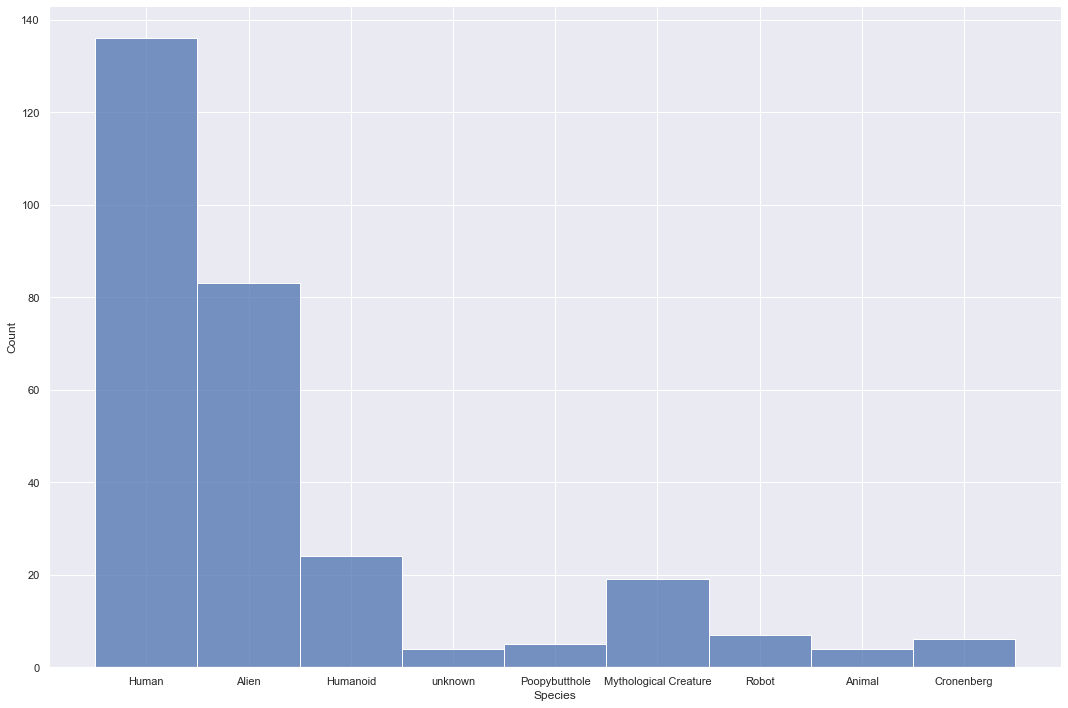

In [70]:

sns.displot(df,x='Species',height=10, aspect=1.5)

As we probably mentioned earlier this show consist of different kind of characters. In this plot here we can easily see that we have 9 different kind of species. Most of the characters are human with aliens and humanoids following. In total we have 288 characters involing our analysis.

In [23]:
df.Status.value_counts()

Alive      137
Dead       106
unknown     45
Name: Status, dtype: int64

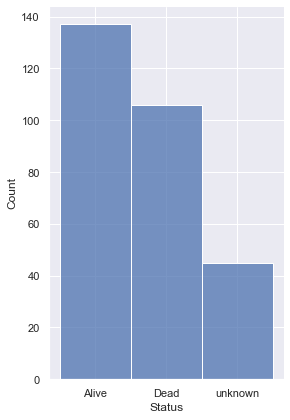

In [75]:
sns.displot(df,x='Status',height=6, aspect=.7)

Another intresting fact is that almost half of them end up being killed through the episodes, well in more than 40 cases we dont really know what happent to the character.

In [87]:
df.LastKnownLocation.str['name'].value_counts()

Earth (Replacement Dimension)                 71
Citadel of Ricks                              45
Interdimensional Cable                        37
Earth (C-137)                                 18
unknown                                       12
Nuptia 4                                       9
Post-Apocalyptic Earth                         8
Worldender's lair                              7
Unity's Planet                                 6
Planet Squanch                                 5
Anatomy Park                                   5
Mr. Goldenfold's dream                         5
Rick's Memories                                5
Purge Planet                                   4
St. Gloopy Noops Hospital                      4
Resort Planet                                  4
Zigerion's Base                                4
Earth (C-500A)                                 3
Dorian 5                                       3
Immortality Field Resort                       3
Heist-Con           

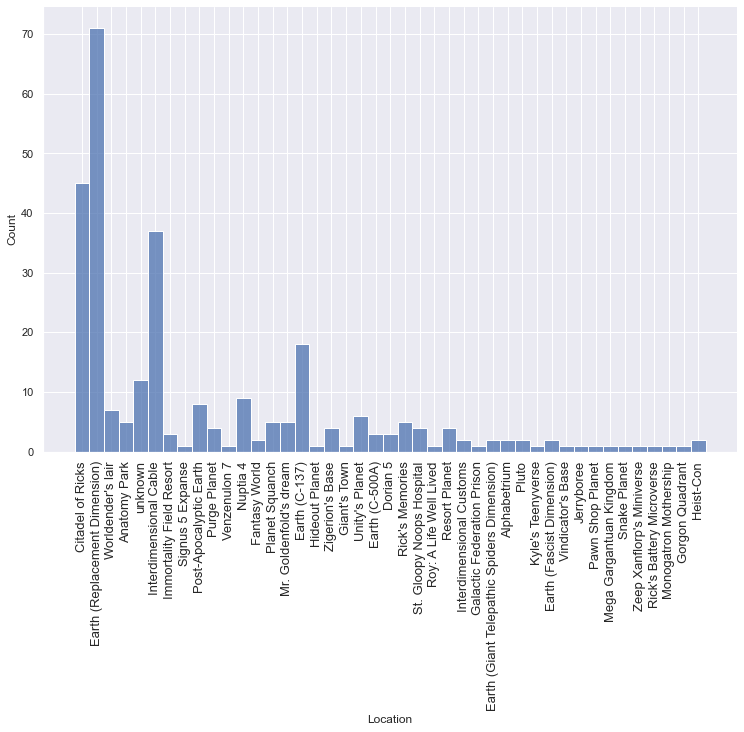

In [101]:
df['Location'] = df.LastKnownLocation.str['name'] #.value_counts()
sns.displot(df,x='Location',height=7, aspect=1.5)
plt.xticks(rotation=90, size=13)
plt.show()

Another intresting think that we mention and it also depicts to the data are all the different areas, planets and universes that the series taken place to. 

In [17]:
print("The Graph consists of ",G.number_of_nodes() ,"nodes and ",G.number_of_edges(),"edges")

The Graph consists of  288 nodes and  877 edges


In [102]:
print("The average shortest path for the network with p=0 is :",nx.average_shortest_path_length(G_un))

The average shortest path for the network with p=0 is : 2.387903407808621


In [19]:
#for the whole network
print("5 most connceted heroes in the whole network based on incoming degree")
print(in_degrees[:5])
print("5 most connceted heroes in the whole network based on outgoing degree")
print(out_degrees[:5])

5 most connceted heroes in the whole network based on incoming degree
[('Rick Sanchez', 148), ('Morty Smith', 130), ('Summer Smith', 35), ('Beth Smith', 32), ('Worldender', 16)]
5 most connceted heroes in the whole network based on outgoing degree
[('Morty Smith', 27), ('Rick Sanchez', 22), ('Summer Smith', 16), ('Beth Smith', 14), ('Morty Jr.', 13)]


Here we have our first ouputs from the Graph. The graph consists of 288 nodes and 877 edges the avverage shorter path of the network is 2.3 and one of the first worth noticed outcomes are the incoming degree of the Worldender which is 16 placing him 5th on the five most connceted heroes. The Worldender is a supervillain and he only appeared in one episode. One of the reason that this character is 5th on the least might be tha fact that he was the nemesis os the Vindicators a supers hero team made in the series consisting of 11 characters. So despite the fact that he was only present in one episode he was connected with a lot of the characters including the main ones.  

100%|██████████| 2000/2000 [00:07<00:00, 262.05it/s]


BarnesHut Approximation  took  0.84  seconds
Repulsion forces  took  6.34  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.19  seconds


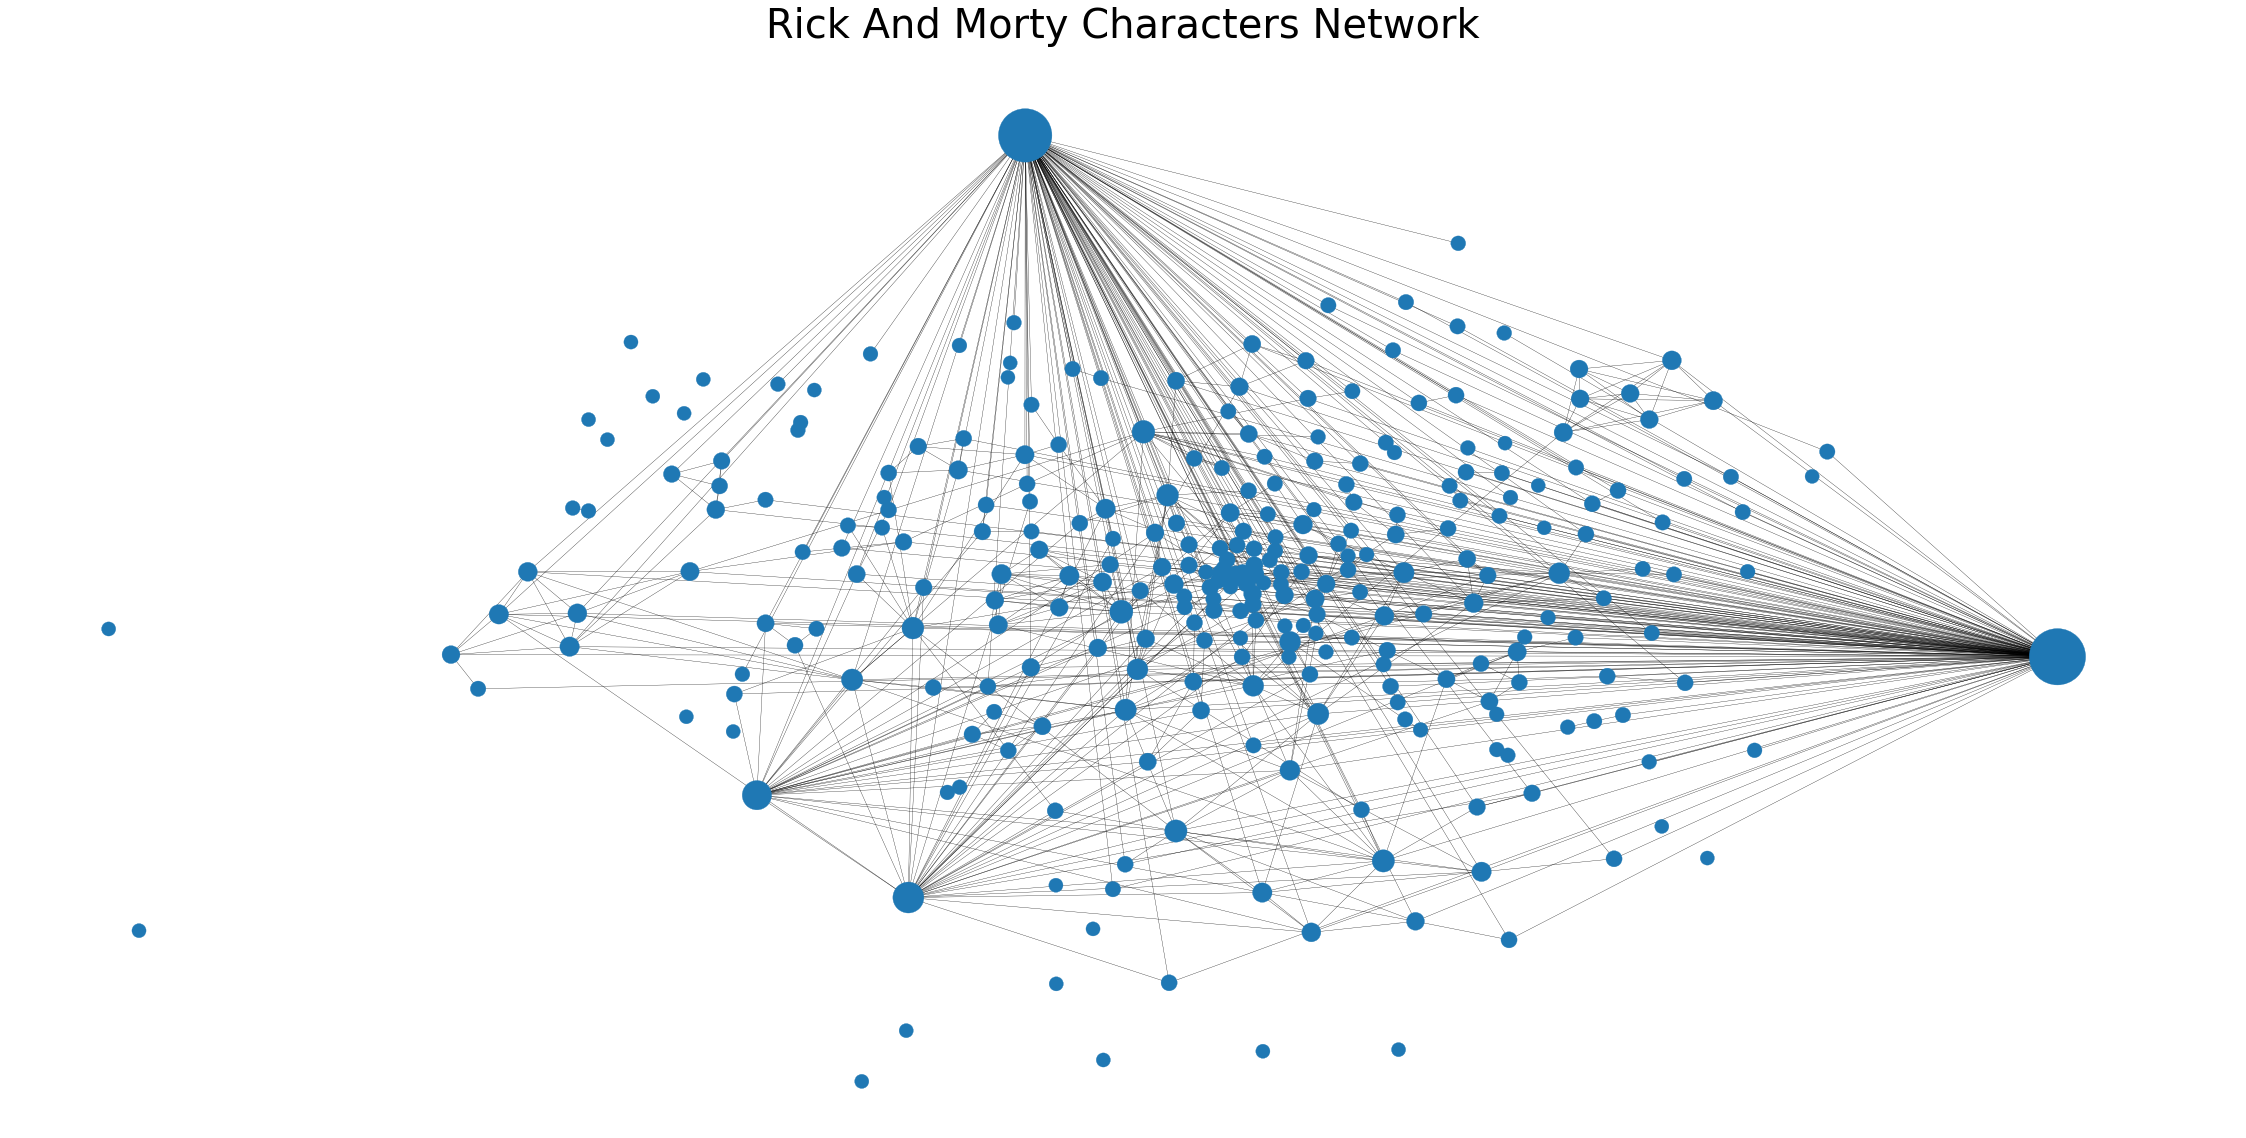

In [42]:
G_un = G.to_undirected()
node_sizes = [val*20+200 for node, val in G_un.degree()]
# node_colors = ['#0000CD' if node[1]['universe'] == "DC" else '#B22222' for node in WCC_undirected.nodes(data=True)]
# edge_colors = ['#000080' if WCC_undirected.nodes[node1]['universe'] == WCC_undirected.nodes[node2]['universe'] == "DC"\
#                else '#8B0000' if WCC_undirected.nodes[node1]['universe'] == WCC_undirected.nodes[node2]['universe'] == "Marvel" \
#                else '#8B008B' for node1,node2 in WCC_undirected.edges]

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.0,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=7,

                        # Log
                        verbose=True)

# plt.figure(figsize=(25,25))
# ax = plt.gca()
# ax.set_title('DC-Marvel Characters Network',fontsize = 40) 
args = {
#'node_color': node_colors,
#'edge_color':edge_colors,
'node_size':node_sizes,
'width':0.3,
'linewidths':0.3,
}

figure = plt.figure(figsize=(40,20))
# plt.savefig(figure, dpi=1200)
ax = plt.gca()
ax.set_title('Rick And Morty Characters Network',fontsize = 40) 

positions = forceatlas2.forceatlas2_networkx_layout(G_un, pos=None, iterations=2000)
nx.draw(G_un,positions, **args, ax=ax)

plt.show()

Text(0.5, 1.0, 'Circular plot of our Graph')

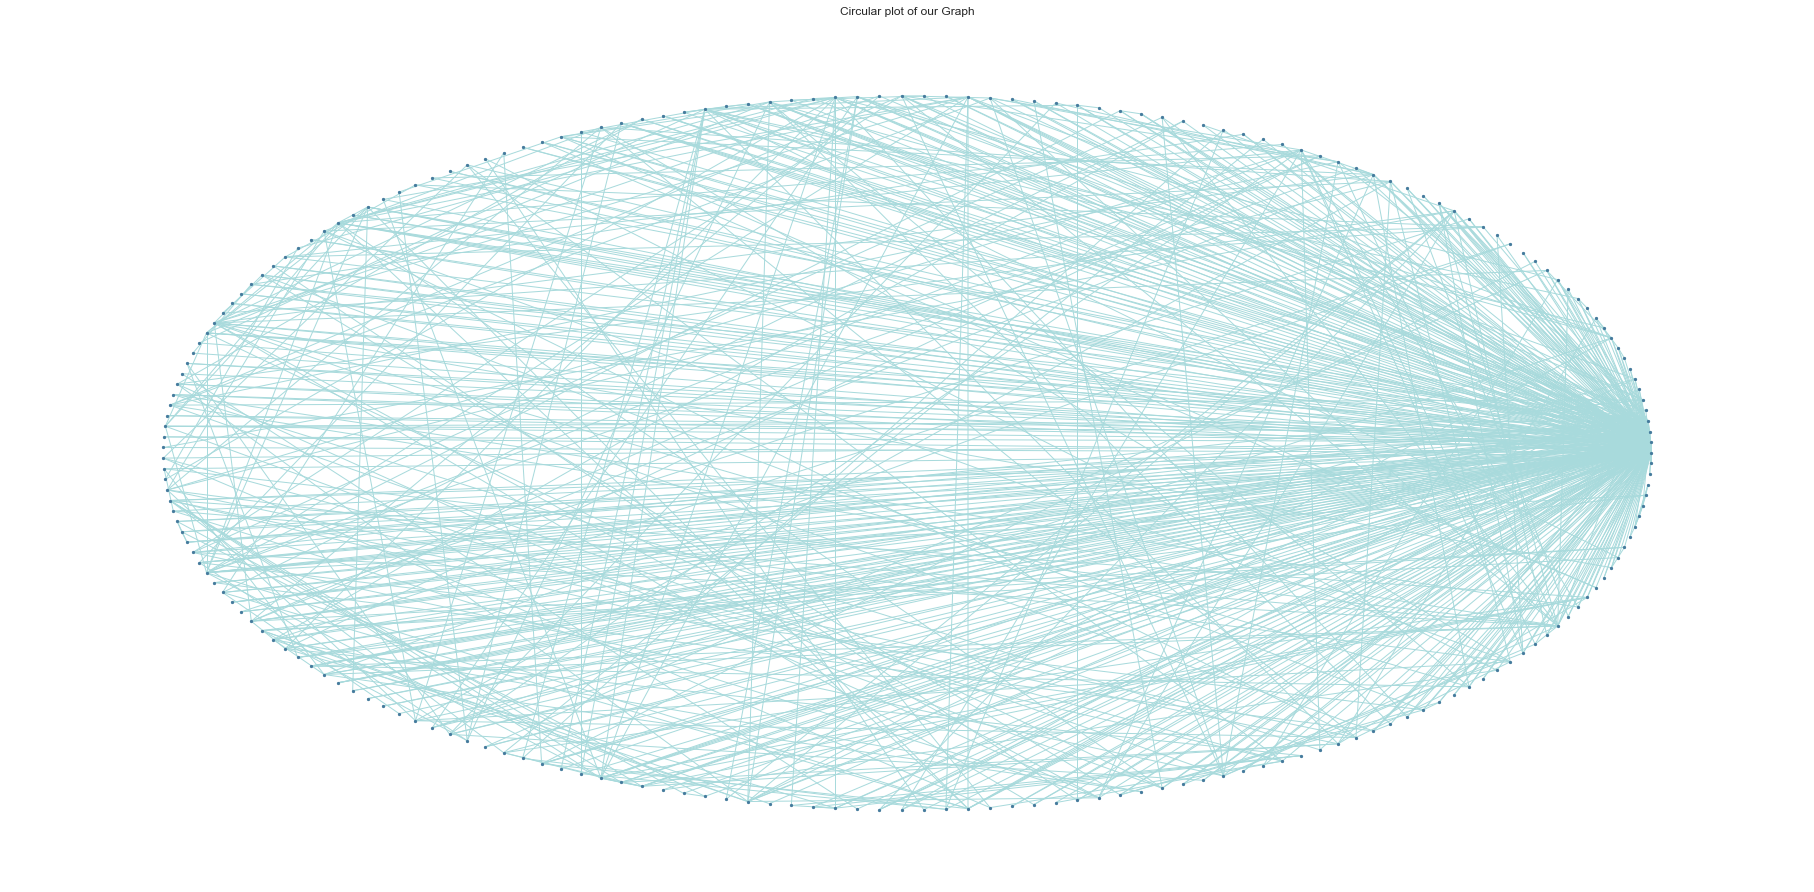

In [112]:
nx.draw_circular(G_un, node_size=5, node_color='#457B9D',edge_color= '#A8DADC')
plt.title('Circular plot of our Graph')

As it was expected the graph representation is created around our main characters. This is a tendency that happens in most of the series, episodes or colection of movies because everything is happening arround the main characters. Espacially in Rick & Morty we have 4-5 main characters that appears in every episode and this has as a result that all the other character in most cases are connected to these 4-5 main characters. We can easily notice that from the graph representation and from the top 5 characters in terms of the in and out degreee we printed earlier. The main characters of the series seem to be Rick Sanchez, Morty Smith, Summer Smith and Beth Smith.

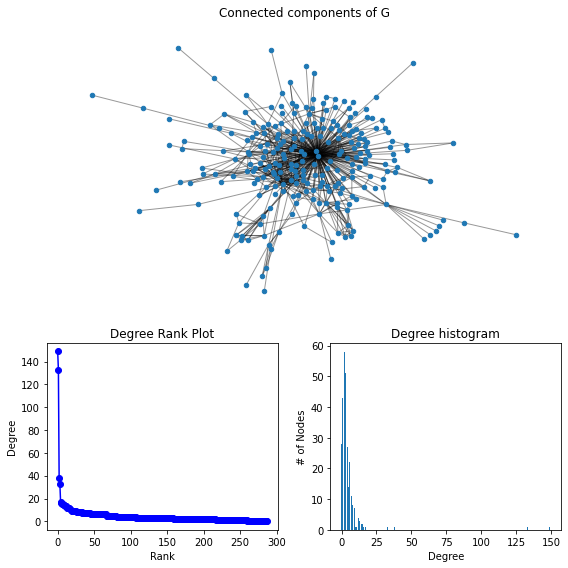

In [10]:
degree_sequence = sorted((d for n, d in G_un.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_un.subgraph(sorted(nx.connected_components(G_un), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

288
877


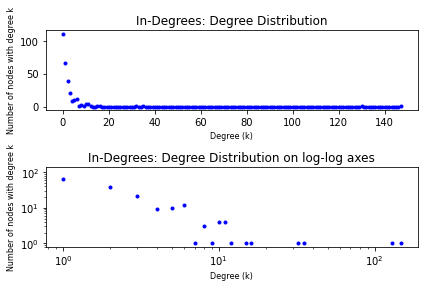

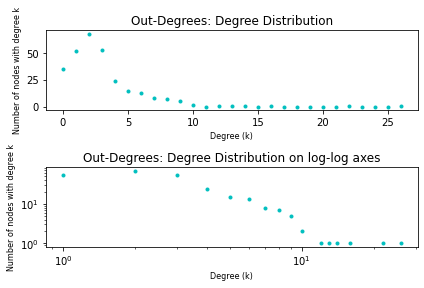

In [11]:
def plot_degree_distribution(degrees, title, color):
    counts, limits = np.histogram(degrees, degrees[0])

    x = limits[:len(counts)]
    y = counts

    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(x, y, color)
    ax1.set_title(title)
    ax1.set_ylabel('Number of nodes with degree k',fontsize=8)
    ax1.set_xlabel('Degree (k)',fontsize=8)

    ax2 =plt.subplot(2, 1, 2)
    ax2.loglog(x, y, color)
    ax2.set_title(title + ' on log-log axes')
    ax2.set_ylabel('Number of nodes with degree k',fontsize=8)
    ax2.set_xlabel('Degree (k)',fontsize=8 )

    plt.tight_layout()
    plt.show()
        
    
in_degrees = sorted(list(G.in_degree()),key=lambda d: d[1], reverse=True)
out_degrees = sorted(list(G.out_degree()),key=lambda d: d[1], reverse=True)

in_only_degrees = [val for node,val in in_degrees]
out_only_degrees = [val for node,val in out_degrees]
    

plot_degree_distribution(in_only_degrees, "In-Degrees: Degree Distribution", 'b.')

plot_degree_distribution(out_only_degrees, "Out-Degrees: Degree Distribution", 'c.')

In the plots above we have the Degree of the hole undirect graph and after that the in and out degree of the graph. The degree of a node in a network is the number of connections or edges the node has where the in and out degree refers to only the number of in nodes and the out nodes of the graph. A metric as basic as the degree distribution can provide insight into a network's structure and help distinguish between various network types. From this analysis we can see that more than 90% of our nodes have less that 25 edges connected while a lot of them have 0 in-dregrees or 0 out-degrees edges. Last, almost 30 of our nodes dont have any connection with other nodes of the graph.

In [30]:
G.nodes.data()

NodeDataView({'Rick Sanchez': {'Species': 'Human', 'Status': 'Alive', 'LastKnownLocation': {'name': 'Citadel of Ricks', 'url': 'https://rickandmortyapi.com/api/location/3'}}, 'Morty Smith': {'Species': 'Human', 'Status': 'Alive', 'LastKnownLocation': {'name': 'Citadel of Ricks', 'url': 'https://rickandmortyapi.com/api/location/3'}}, 'Summer Smith': {'Species': 'Human', 'Status': 'Alive', 'LastKnownLocation': {'name': 'Earth (Replacement Dimension)', 'url': 'https://rickandmortyapi.com/api/location/20'}}, 'Beth Smith': {'Species': 'Human', 'Status': 'Alive', 'LastKnownLocation': {'name': 'Earth (Replacement Dimension)', 'url': 'https://rickandmortyapi.com/api/location/20'}}, 'Adjudicator Rick': {'Species': 'Human', 'Status': 'Dead', 'LastKnownLocation': {'name': 'Citadel of Ricks', 'url': 'https://rickandmortyapi.com/api/location/3'}}, 'Alan Rails': {'Species': 'Human', 'Status': 'Dead', 'LastKnownLocation': {'name': "Worldender's lair", 'url': 'https://rickandmortyapi.com/api/location/

In [32]:
nx.get_node_attributes(G, "Species")

{'Rick Sanchez': 'Human',
 'Morty Smith': 'Human',
 'Summer Smith': 'Human',
 'Beth Smith': 'Human',
 'Adjudicator Rick': 'Human',
 'Alan Rails': 'Human',
 'Albert Einstein': 'Human',
 'Alexander': 'Human',
 'Alien Googah': 'Alien',
 'Alien Morty': 'Alien',
 'Alien Rick': 'Alien',
 'Amish Cyborg': 'Alien',
 'Annie': 'Human',
 'Antenna Morty': 'Human',
 'Antenna Rick': 'Human',
 'Ants in my Eyes Johnson': 'Human',
 'Aqua Morty': 'Humanoid',
 'Aqua Rick': 'Humanoid',
 'Arcade Alien': 'Alien',
 'Armagheadon': 'Alien',
 'Armothy': 'unknown',
 'Arthricia': 'Alien',
 'Artist Morty': 'Human',
 'Attila Starwar': 'Human',
 'Baby Legs': 'Human',
 'Baby Poopybutthole': 'Poopybutthole',
 'Baby Wizard': 'Alien',
 'Bearded Lady': 'Alien',
 'Beebo': 'Alien',
 'Benjamin': 'Poopybutthole',
 'Beta-Seven': 'Alien',
 "Beth's Mytholog": 'Mythological Creature',
 'Big Boobed Waitress': 'Mythological Creature',
 'Big Morty': 'Human',
 'Birdperson': 'Alien',
 'Blim Blam': 'Alien',
 'Blue Footprint Guy': 'Huma

100%|██████████| 2000/2000 [00:04<00:00, 497.26it/s]


BarnesHut Approximation  took  0.69  seconds
Repulsion forces  took  3.04  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.12  seconds


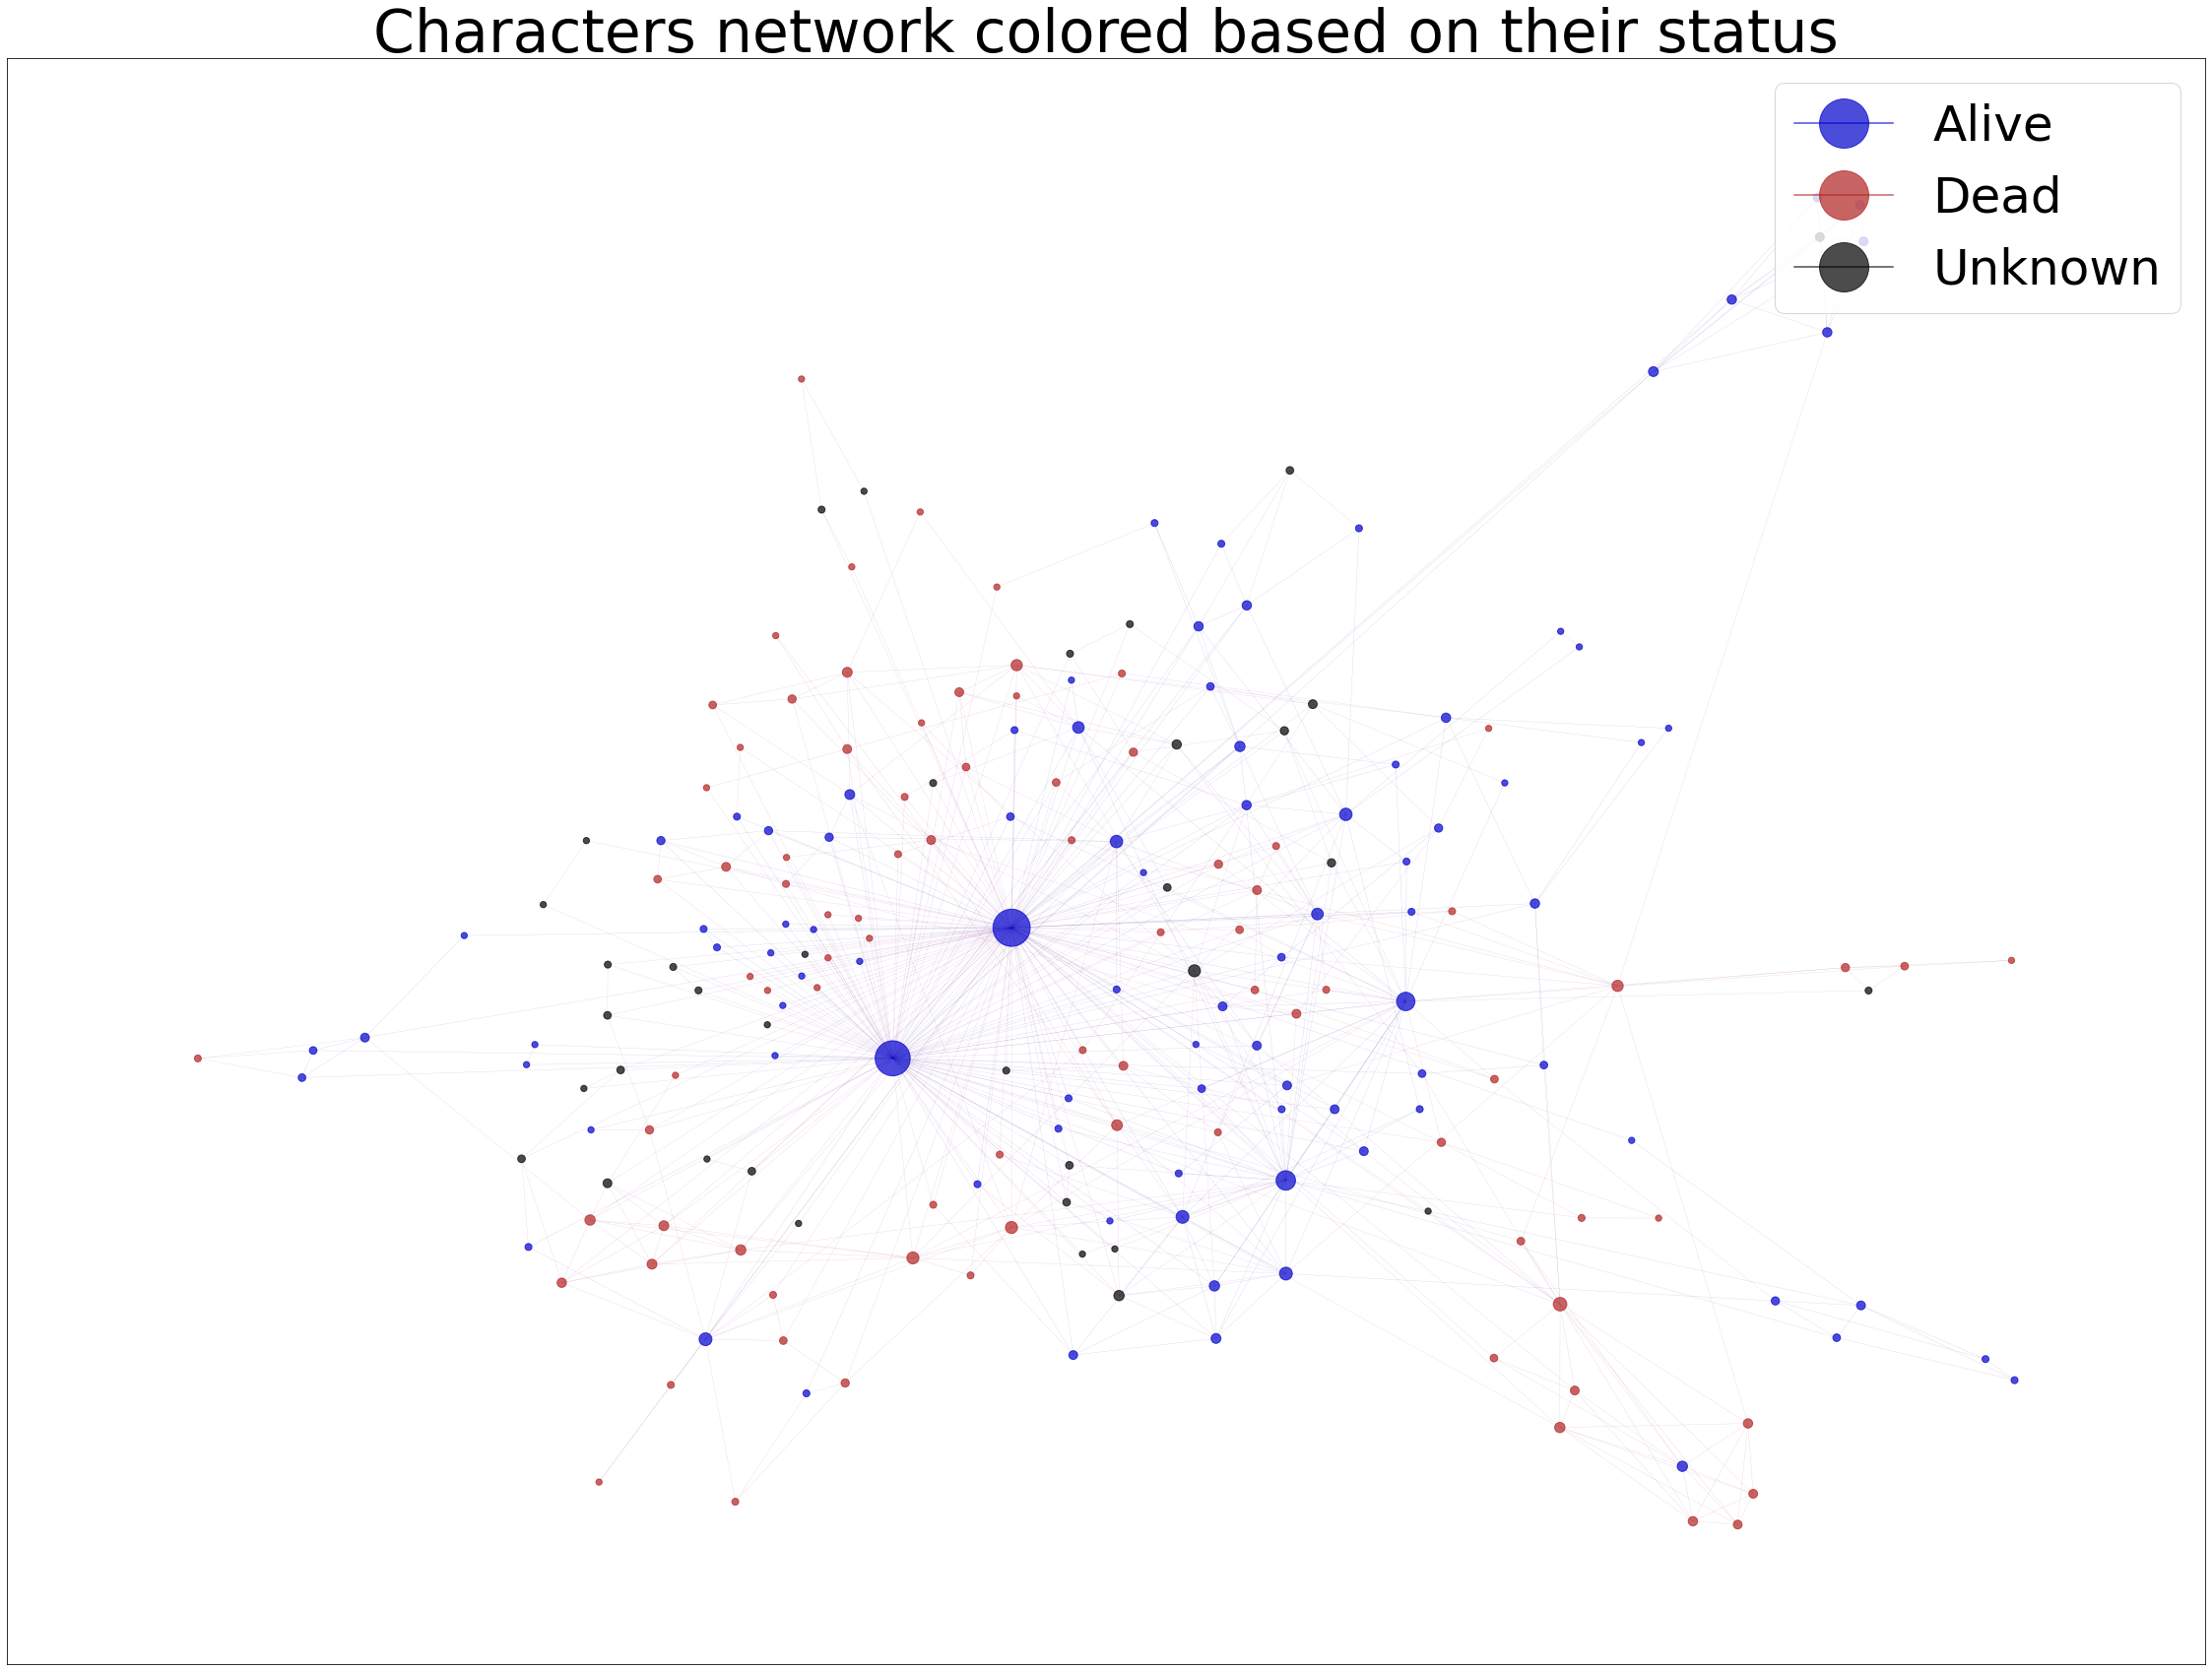

In [49]:
#Delete nodes with no edges
G_un.remove_nodes_from(list(nx.isolates(G_un)))

#Delete nodes with one edge
to_be_removed = [x for  x in G_un.nodes() if G_un.degree(x) <= 1]

for x in to_be_removed:
    G_un.remove_node(x)

#Color the nodes/edges
node_sizes = [val*10+20 for node, val in G_un.degree()]
node_colors = ['#0000CD' if node[1]['Status'] == "Alive" else '#B22222' if node[1]['Status'] == "Dead" else '#000000' for node in G_un.nodes(data=True)]
edge_colors = ['#000080' if G_un.nodes[node1]['Status'] == G_un.nodes[node2]['Status'] == "Alive"\
               else '#8B0000' if G_un.nodes[node1]['Status'] == G_un.nodes[node2]['Status'] == "Dead" \
               else '#8B008B' for node1,node2 in G_un.edges]

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.0,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=-1,

                        # Log
                        verbose=True)

# plt.figure(figsize=(25,25))
# ax = plt.gca()
# ax.set_title('DC-Marvel Characters Network',fontsize = 40) 
args = {
'node_color': node_colors,
'edge_color':edge_colors,
'node_size':node_sizes,
'width':0.3,
'linewidths':0.3,
}

figure = plt.figure(figsize=(40,30))
# plt.savefig(figure, dpi=1200)
ax = plt.gca()
ax.set_title('Characters network colored based on their status',fontsize = 60) 

positions = forceatlas2.forceatlas2_networkx_layout(G_un, pos=None, iterations=2000)
#nx.draw(GCC_undirected,positions, **args, ax=ax)

nx.draw_networkx_nodes(
    G = G_un,
    node_size = node_sizes,
    pos = positions, 
    node_color = node_colors,
    alpha = 0.7
)
nx.draw_networkx_edges(
    G = G_un,
    pos = positions, 
    edge_color = edge_colors, 
    alpha = 0.2,
    width = 0.3
    #linewidths=0.3
)

legends = [Line2D([0], [0], marker='o', color='#0000CD', label= "Alive", markersize=50, alpha=0.7),
          Line2D([0], [0], marker='o', color='#B22222', label= "Dead", markersize=50, alpha=0.7),
          Line2D([0], [0], marker='o', color='#000000', label= "Unknown", markersize=50, alpha=0.7)]
plt.legend(handles = legends, loc = 1, fontsize = 50)
plt.show()

plt.show()

# Communities


Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
This is the partition of highest modularity, i.e. the highest partition of the dendrogram generated by the Louvain algorithm.

In [115]:
# Get best partition
partition = community.best_partition(G_un)
print('Modularity: ', community.modularity(partition, G_un))

Modularity:  0.4287759149089599


<Figure size 936x648 with 0 Axes>

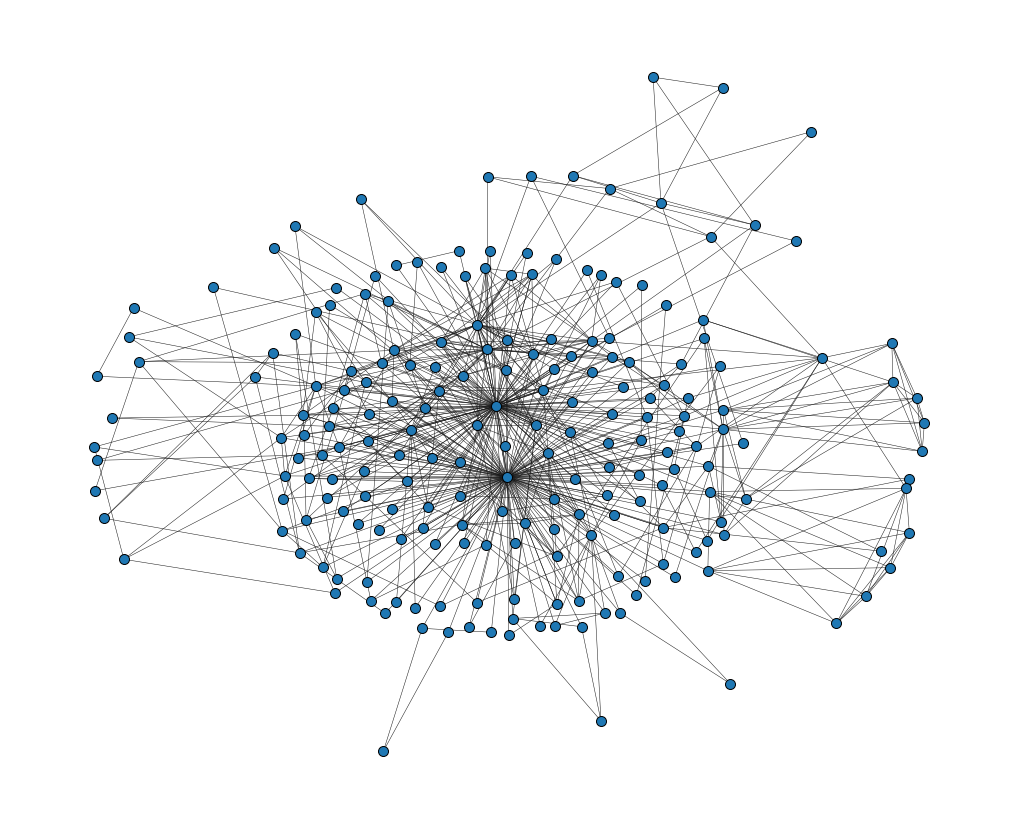

In [142]:
# Draw graph
plt.figure(figsize=(13, 9))
size = float(len(set(partition.values())))


plt.figure(figsize=(18,15))
pl = nx.draw_networkx(G_un,pos=nx.kamada_kawai_layout(G_un),with_labels=False,node_size = 100,width = 0.5 ,edgecolors = 'black')
plt.axis('off')
plt.show()

In [132]:
# Keep only communities with a minimum of connections
centers = {}
communities = {}
G_main_com = G_un.copy()
min_nb = 15


for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' connected characters:')
        print(list_nodes, '\n')

Community of  Morty Smith (ID  0 ) -  69  connected characters:
['Rick Sanchez', 'Morty Smith', 'Alien Googah', 'Alien Morty', 'Alien Rick', 'Aqua Morty', 'Aqua Rick', 'Arthricia', 'Baby Wizard', 'Beebo', 'Big Boobed Waitress', 'Birdperson', 'Blue Footprint Guy', 'Blue Shirt Morty', 'Colossus', 'Concerto', 'Courier Flap', 'Cronenberg Rick', 'Cronenberg Morty', 'Cyclops Morty', 'Cyclops Rick', 'Dale', 'Dipper and Mabel Mortys', 'Doofus Rick', 'Eric Stoltz Mask Morty', 'Eyehole Man', 'Fart', 'General Nathan', 'General Store Owner', 'Glenn', 'Harold', 'Hookah Alien', 'Insurance Rick', 'Jacqueline', 'Jaguar', 'Jamey', 'Jan-Michael Vincent', 'Katarina', 'King Flippy Nips', 'Krombopulos Michael', 'Lawyer Morty', 'Lighthouse Keeper', 'Lil B', 'Morty Rick', 'Mr. Benson', 'Mr. Booby Buyer', 'Pawnshop Clerk', 'Pencilvester', 'Phillip Jacobs', 'Purge Planet Ruler', 'Reverse Giraffe', 'Scroopy Noopers', 'Scropon', 'Slippery Stair', 'Solicitor Rick', 'Squanchy', 'Stacy', 'Taddy Mason', 'Tiny Rick',

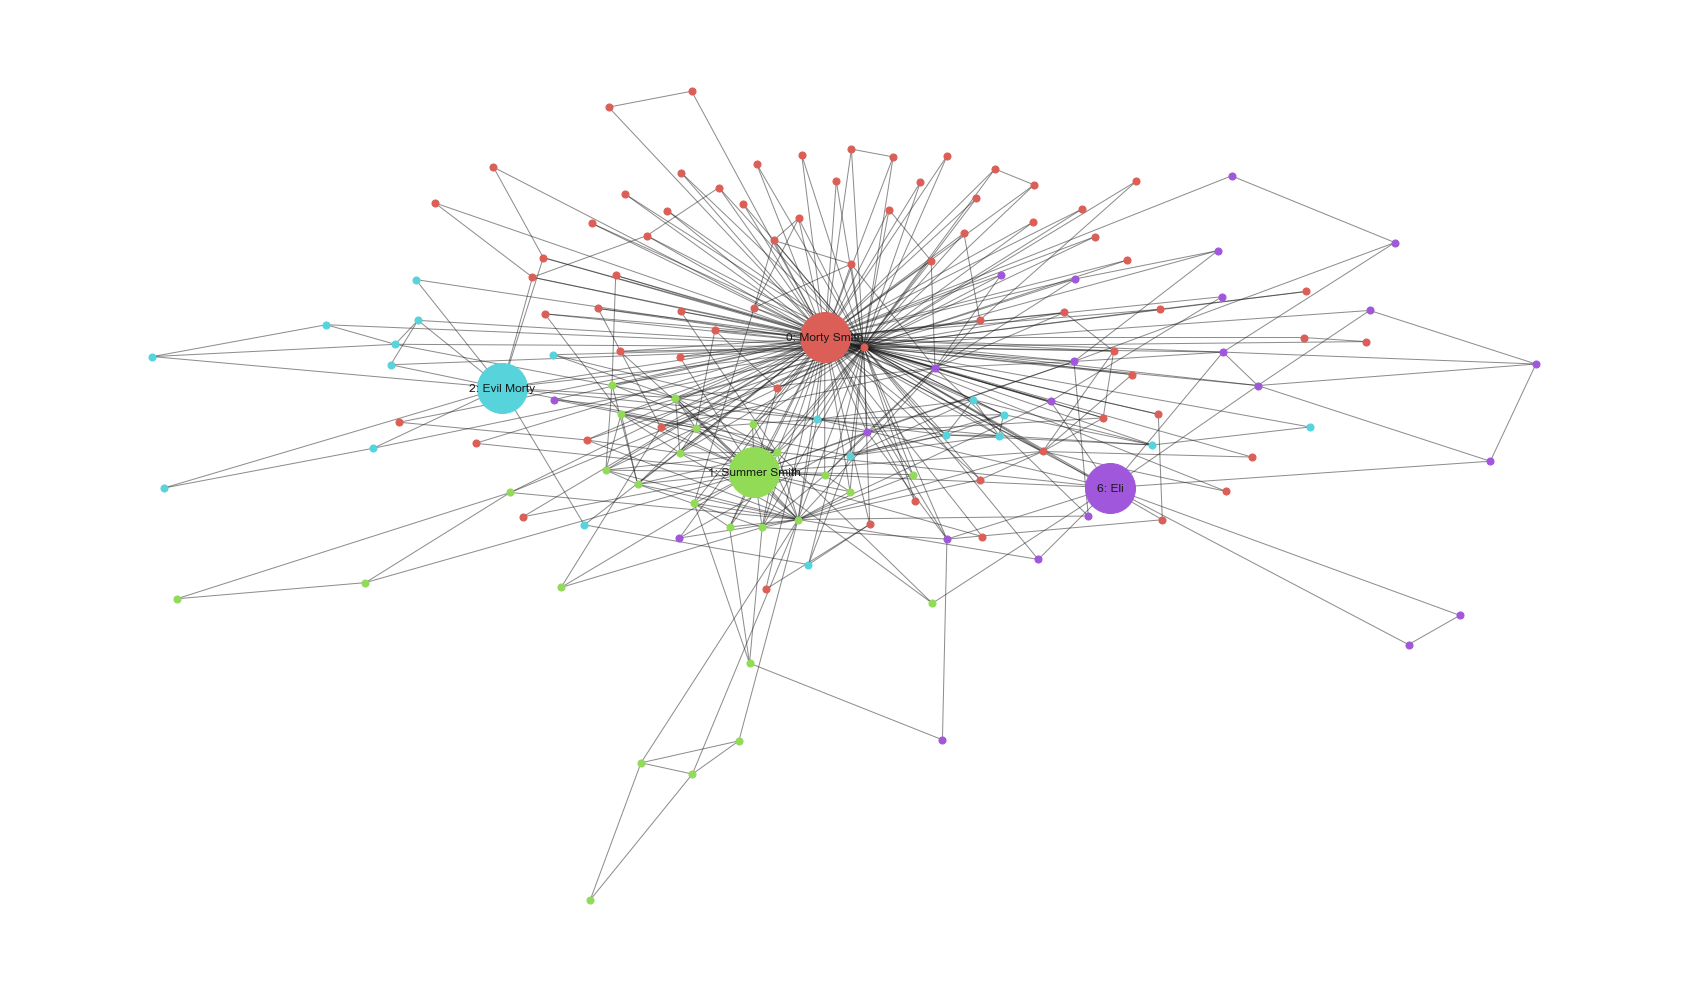

In [141]:
# Display graph
plt.figure(figsize=(30, 18))
node_size = 50
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*50, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
labels = {k: str(v) + ': ' + k for k,v in centers.items()}
nx.draw_networkx_labels(G_main_com, pos, labels)
plt.axis('off')
plt.show()

[['Jacqueline', 'Robot Rick', 'Courier Flap', 'Gibble Snake', 'Scary Brandon', "Eli's Girlfriend", 'Slow Mobius', 'Glar', 'Evil Morty', 'Stu', 'Annie', 'Rick D. Sanchez III', 'Jan-Michael Vincent', 'Steve', 'Reverse Rick Outrage', 'Roger', 'Glenn', 'Mr. Meeseeks', 'Hologram Rick', 'Trandor', 'Cool Rick', 'Poncho', 'Aqua Morty', 'Blim Blam', 'Toxic Rick', 'Simple Rick', 'Morty Jr.', 'Doom-Nomitron', 'Samantha', 'Aqua Rick', 'Insurance Rick', 'Lil B', 'Logic', 'Mrs. Pancakes', 'Mr. Beauregard', 'Morty Smith', 'Dr. Xenon Bloom', 'Beta-Seven', 'Benjamin', 'Ruben', 'Joyce Smith', 'Crocubot', 'Commander Rick', 'Armothy', 'Albert Einstein', 'Supernova', 'Colossus', 'Evil Summer Clone', 'Steven Phillips', 'Morty Rick', 'Phillip Jacobs', 'Principal Vagina', 'Baby Wizard', 'Evil Beth Clone', 'Noob-Noob', 'Vance Maximus', 'Birdperson', 'Regional Manager Rick', 'Risotto Groupon', 'Nancy', 'Paul Fleishman', 'Garment District Rick', 'Squanchy', 'Hemorrhage', 'Glasses Morty', 'General Store Owner', '

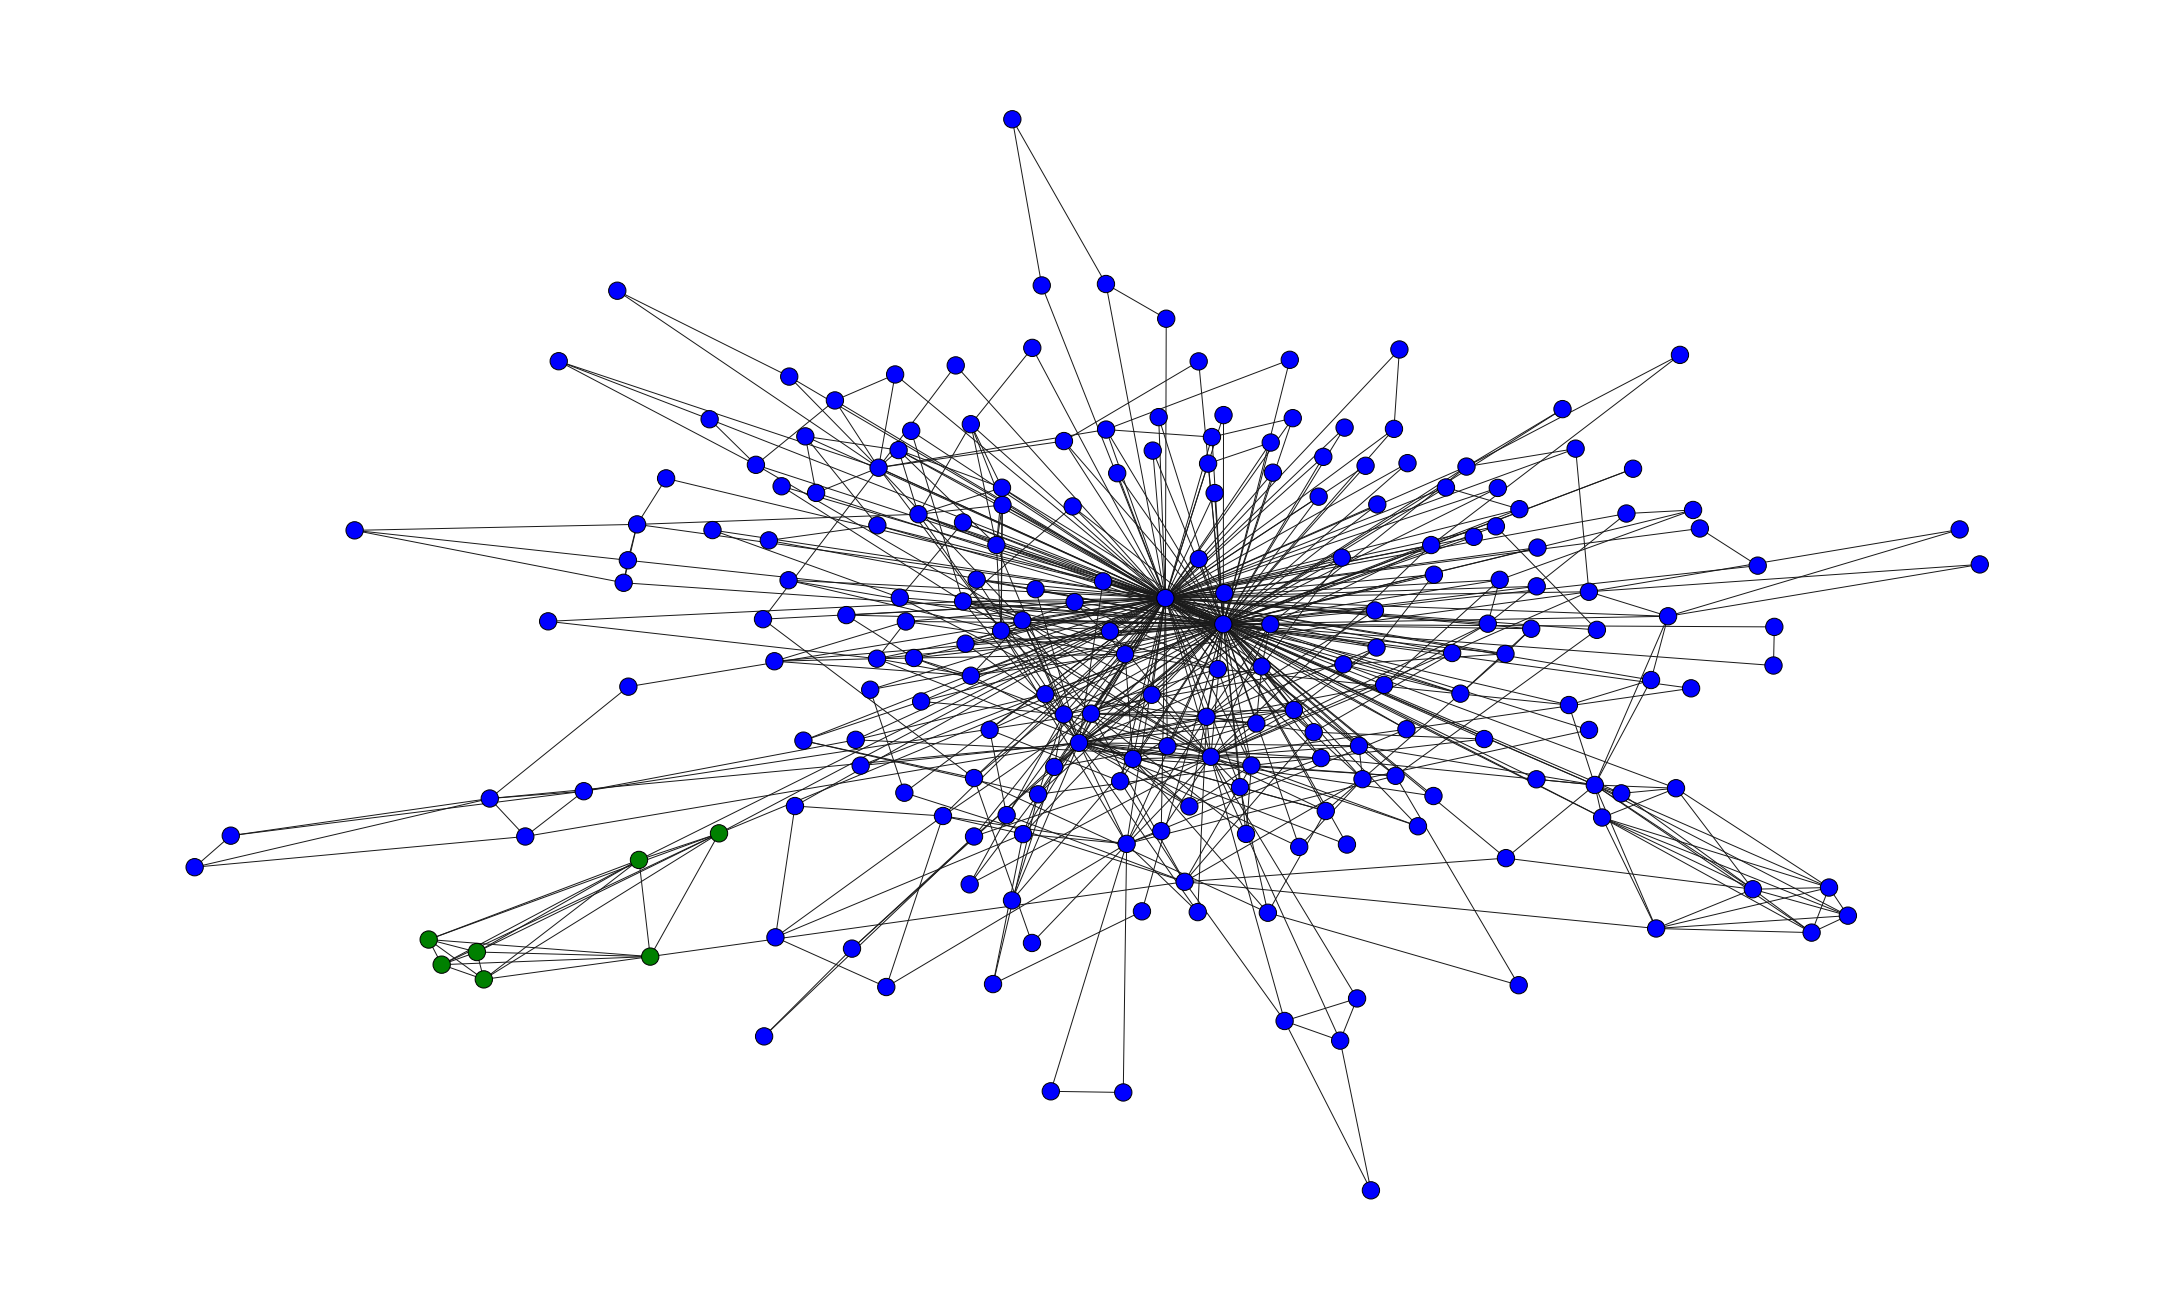

In [146]:
# girvan_newman

communities = girvan_newman(G_un)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G_un:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

plt.figure(figsize=(30, 18))
nx.draw(G_un, node_color=color_map, with_labels=False,edgecolors = 'black')
plt.show()

In [148]:
#k-clique communities
communities = list(k_clique_communities(G_un, 3))

In [152]:
len(communities)

8

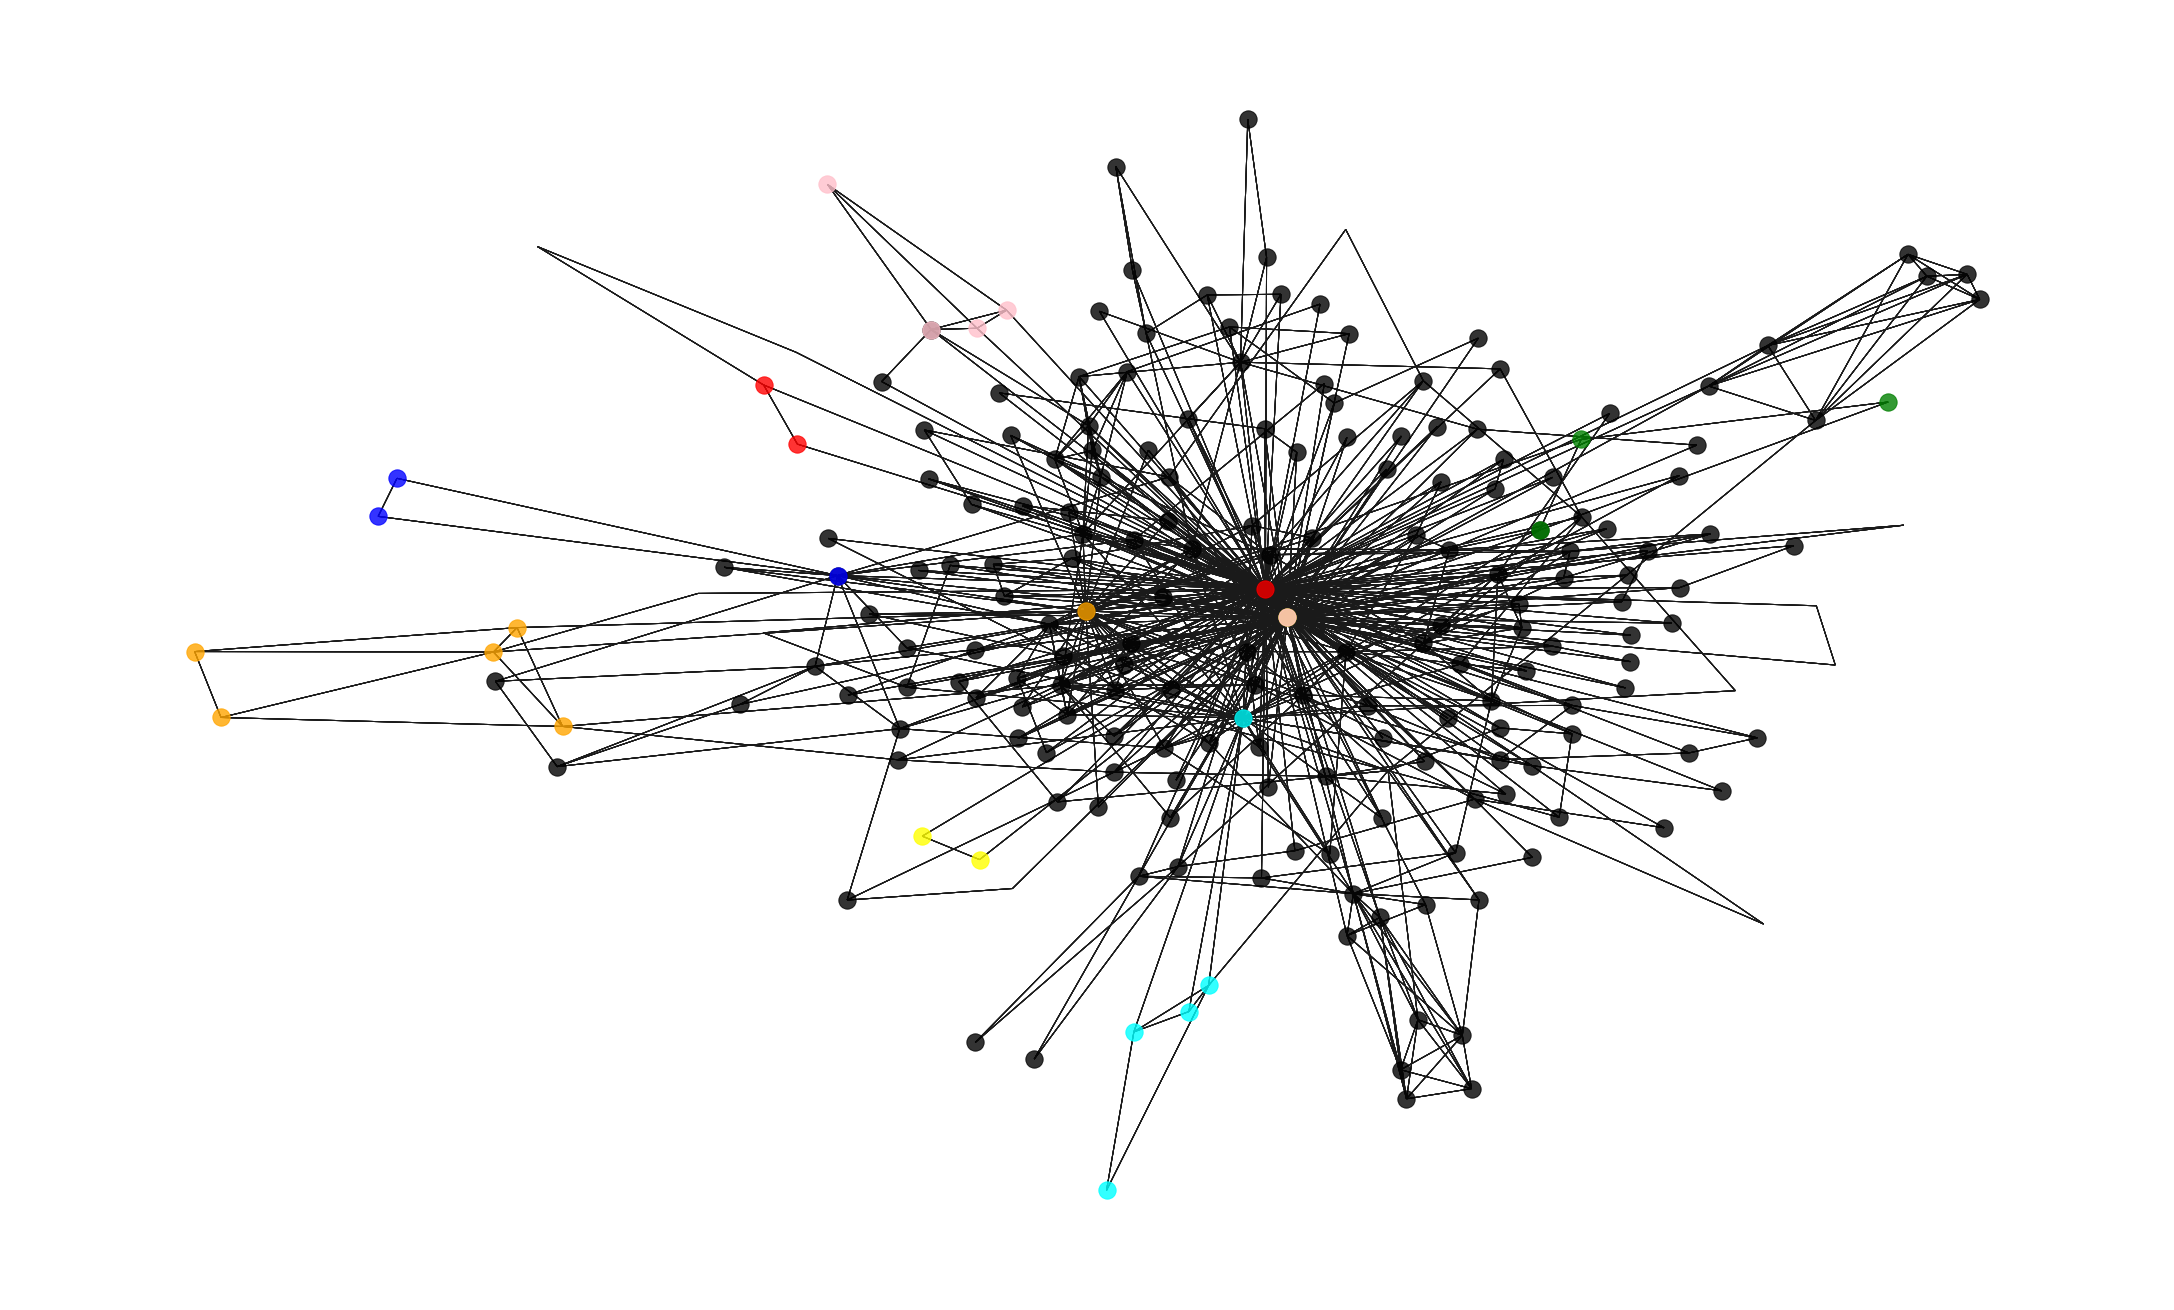

In [156]:
pos = nx.spring_layout(G_un)
colors = ["black", "orange", "cyan", "blue", "green", "yellow", "pink", "red"]

plt.figure(figsize=(30, 18))

for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(G_un, pos, nodelist=node_list, node_color=colors[i], alpha=0.8)
    
plt.show()

# Centrality


In [160]:
N=15

# betweeness centrality
betweeness_centrality_dict = nx.betweenness_centrality(G_un)
betweeness_centrality_dict = dict(sorted(betweeness_centrality_dict.items(), reverse=True, key=lambda item: item[1]))
print(N, "most central characters according to betweeness centrality : ")
for i in range (N):
    character_name_i = list(betweeness_centrality_dict.keys())[i]
    print(f"- {character_name_i} : {betweeness_centrality_dict[character_name_i]}")

15 most central characters according to betweeness centrality : 
- Rick Sanchez : 0.5281442898571294
- Morty Smith : 0.36964482278302097
- Beth Smith : 0.05816690918378897
- Summer Smith : 0.05790746859380175
- Bobby Moynihan : 0.029784300153404778
- Eli : 0.027981031795467962
- Worldender : 0.024009470962078713
- Doom-Nomitron : 0.018008998009952194
- Evil Morty : 0.016031874462978952
- Piece of Toast : 0.014203886415096272
- Morty Jr. : 0.012925142668416429
- Noob-Noob : 0.012215516819071168
- Evil Beth Clone : 0.01202604984770961
- Jeff : 0.011132808264708867
- Gene : 0.009526268475173861


In [161]:
degree_centrality_dict = nx.algorithms.centrality.degree_centrality(G_un)
degree_centrality_dict = dict(sorted(degree_centrality_dict.items(), reverse=True, key=lambda item: item[1]))
print(N,"most central characters according to degree centrality : ")
for i in range (N):
    character_name_i = list(degree_centrality_dict.keys())[i]
    print(f"- {character_name_i} : {degree_centrality_dict[character_name_i]}")

15 most central characters according to degree centrality : 
- Rick Sanchez : 0.6714285714285715
- Morty Smith : 0.5952380952380953
- Summer Smith : 0.1761904761904762
- Beth Smith : 0.15714285714285717
- Worldender : 0.08095238095238096
- Evil Morty : 0.07142857142857144
- Hemorrhage : 0.07142857142857144
- Morty Jr. : 0.07142857142857144
- Eli : 0.06666666666666668
- Jessica : 0.06666666666666668
- Diane Sanchez : 0.06190476190476191
- Ethan : 0.06190476190476191
- Rick Prime : 0.06190476190476191
- Birdperson : 0.05714285714285715
- Brad : 0.05714285714285715


In [173]:
degree_centrality_dict = nx.algorithms.centrality.voterank(G_un,N)
#degree_centrality_dict = dict(sorted(degree_centrality_dict.items(), reverse=True, key=lambda item: item[1]))
print("list of",N,"influential nodes in a graph using VoteRank algorithm : ")
for i in range (N):
    character_name_i = degree_centrality_dict[i]
    print(character_name_i)

list of 15 influential nodes in a graph using VoteRank algorithm : 
Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Worldender
Evil Morty
Chris
Eli
Jessica
Birdperson
Bobby Moynihan
Supernova
Ethan
Jeff
Maximums Rickimus


In [175]:
#many more algorithms to use here